In [5]:
# Reading the csv file

# Importing the library
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

         time  tavg  tmin  tmax  prcp wdir  wspd    pres  year   Month  \
0  2019-07-21  32.3  28.3  36.7   0.0  263  22.3  1006.0  2019    July   
1  2018-08-29  31.8  27.2  36.7   0.0  242  18.4  1013.0  2018  August   
2  2021-06-29  31.5  26.1  37.2   0.0  253  16.9  1019.2  2021    June   
3  2019-07-20  31.4  26.7  36.1   0.0  245  15.8  1007.6  2019    July   
4  2021-06-30  31.0  22.2  37.8   4.1  237  15.8  1013.6  2021    June   

  temperature_category  tavgnorm  tavg_z_score_norm precipitation  
0                 Warm  1.000000           2.170842            No  
1                 Warm  0.990020           2.118540            No  
2                 Warm  0.984032           2.087159            No  
3                 Warm  0.982036           2.076699            No  
4                 Warm  0.974052           2.034858           Yes  


In [13]:
# Data Analysis 6: Descriptive Statistics

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Select the numeric columns
numeric_cols = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']

# Convert non-numeric values to NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=numeric_cols, inplace=True)

# Get descriptive statistics
statistics = df[numeric_cols].describe()
print("Descriptive statistics:")
print(statistics)

Descriptive statistics:
              tavg         tmin         tmax         prcp         wdir  \
count  3066.000000  3066.000000  3066.000000  3066.000000  3066.000000   
mean     11.440802     7.356817    15.707078     2.998858   200.876712   
std       9.650993     9.492641    10.328225     7.681539   100.070063   
min     -17.800000   -23.300000   -12.100000     0.000000     0.000000   
25%       3.900000     0.000000     7.200000     0.000000   112.000000   
50%      11.100000     7.200000    15.600000     0.000000   226.500000   
75%      19.875000    15.600000    24.400000     1.500000   279.000000   
max      32.300000    28.300000    37.800000    78.000000   360.000000   

              wspd         pres  
count  3066.000000  3066.000000  
mean     18.375995  1016.273646  
std       5.994128     7.747112  
min       2.500000   983.900000  
25%      14.400000  1011.300000  
50%      17.300000  1016.200000  
75%      21.600000  1021.300000  
max      61.200000  1042.400000  


In [15]:
# Data Analysis 7: Finding Mode and Median

# Get median values
median_values = df[numeric_cols].median()
print("\nMedian values:")
print(median_values)

# Get mode values
mode_values = df[numeric_cols].mode().iloc[0]  # Mode might have multiple values, so we take the first row
print("\nMode values:")
print(mode_values)


Median values:
tavg      11.1
tmin       7.2
tmax      15.6
prcp       0.0
wdir     226.5
wspd      17.3
pres    1016.2
dtype: float64

Mode values:
tavg       3.9
tmin       0.6
tmax       6.1
prcp       0.0
wdir     271.0
wspd      15.5
pres    1016.0
Name: 0, dtype: float64


In [71]:
# Data Analysis 8: Pivot Table 3

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Create the desired pivot table
pivot_table = pd.pivot_table(df, 
                              index='year',  # Years column in rows
                              columns='precipitation',  # Precipitation column in filters
                              values='tavg',  # Tavg values for which we want to calculate average
                              aggfunc='mean')  # Calculate the average

# Print the pivot table
print(pivot_table)


precipitation         No        Yes
year                               
2013           13.059204  13.443810
2014           11.027311   9.685827
2015           12.364876   7.868293
2016           11.952610  11.194017
2017           11.645815  10.811594
2018           11.217568  12.081119
2019           11.612857  12.002581
2020           12.107229  11.241026
2021           11.897403  13.426119
2022           11.993827  11.809016
2023            2.012903   3.303448


In [5]:
# Data Analysis: Regression Analysis between values of tavg and prcp

# Import the required libraries
import pandas as pd
import statsmodels.api as sm

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Define the independent variable (X) and dependent variable (y)
X = df['prcp']  # Independent variable (precipitation)
y = df['tavg']  # Dependent variable (average temperature)

# Add a constant 
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   tavg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1278
Date:                Wed, 03 Apr 2024   Prob (F-statistic):              0.721
Time:                        20:46:51   Log-Likelihood:                -13430.
No. Observations:                3653   AIC:                         2.686e+04
Df Residuals:                    3651   BIC:                         2.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5689      0.170     68.103      0.0

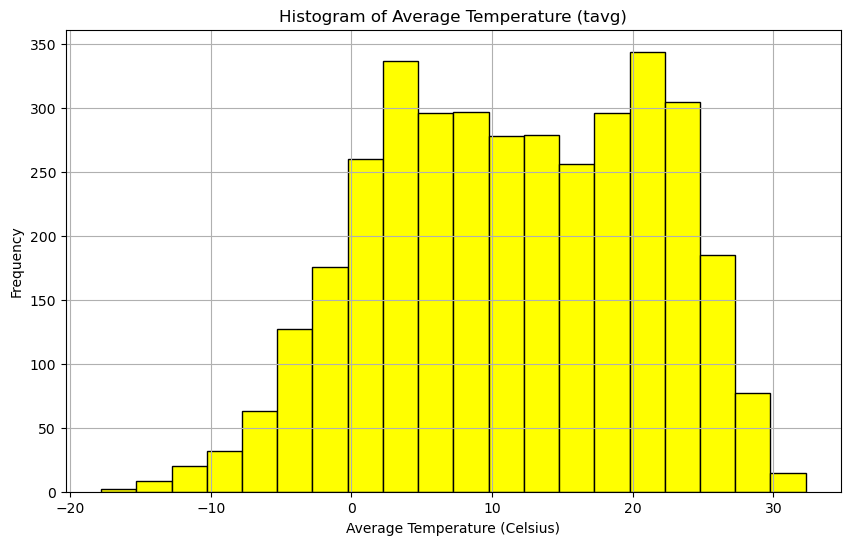

In [8]:
# Data Visualization 1: Histogram of Average Temperature

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Plot histogram for tavg
plt.figure(figsize=(10, 6))
plt.hist(df['tavg'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Average Temperature (tavg)')
plt.xlabel('Average Temperature (Celsius)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


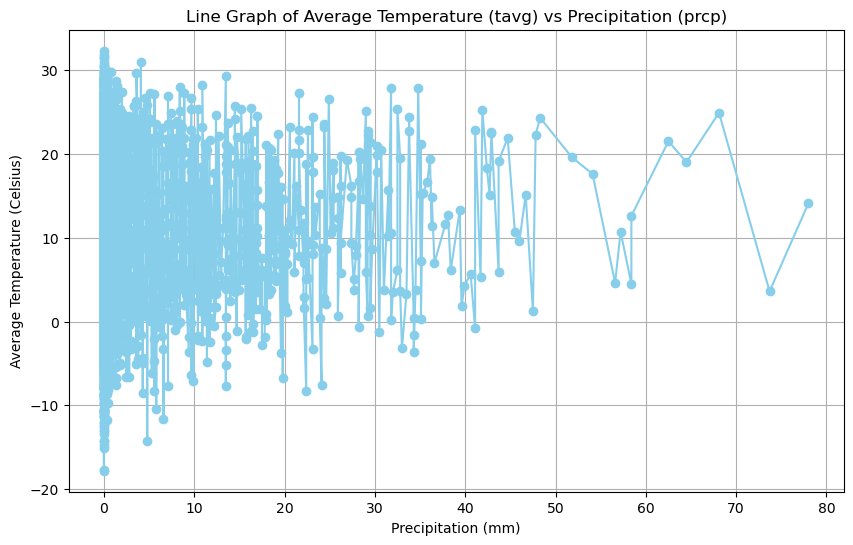

In [32]:
# Data Visualization 2: Line graph between avergae temperature and Precipitation

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Sort the DataFrame by 'prcp' for better visualization
df.sort_values(by='prcp', inplace=True)

# Plot line graph for tavg and prcp
plt.figure(figsize=(10, 6))
plt.plot(df['prcp'], df['tavg'], marker='o', color='skyblue', linestyle='-')
plt.title('Line Graph of Average Temperature (tavg) vs Precipitation (prcp)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Temperature (Celsius)')
plt.grid(True)
plt.show()

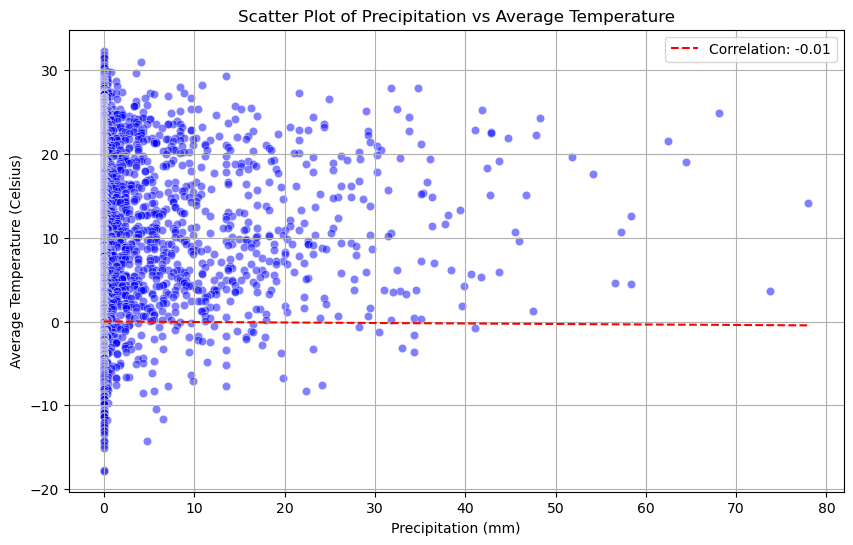

In [13]:
# Data Visualization 3: Correlation plot between average temperaure and Precipitation

# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('Joshi_manipulated_dataset.csv')

# Calculate the correlation between prcp and tavg
correlation = df['prcp'].corr(df['tavg'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='prcp', y='tavg', color='blue', alpha=0.5)

# Plot the correlation line
x = np.array([df['prcp'].min(), df['prcp'].max()])
y = correlation * x
plt.plot(x, y, color='red', linestyle='--', label=f'Correlation: {correlation:.2f}')

# Plot labels and legend
plt.title('Scatter Plot of Precipitation vs Average Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Average Temperature (Celsius)')
plt.legend()

# Plot the visualization
plt.grid(True)
plt.show()


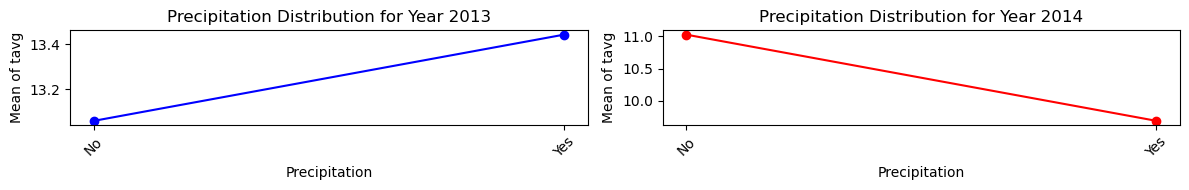

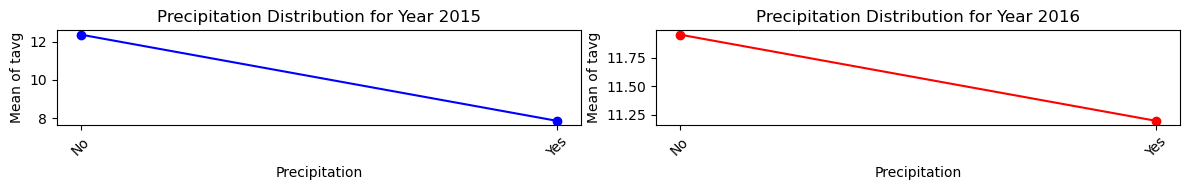

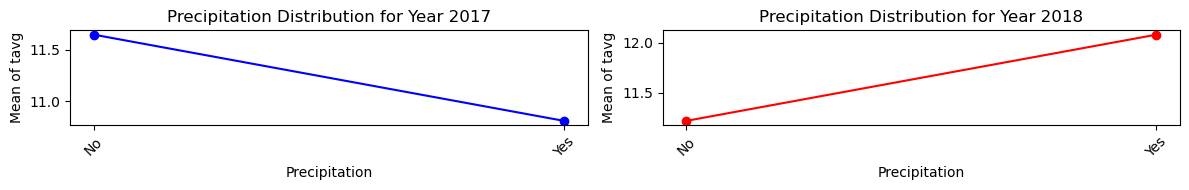

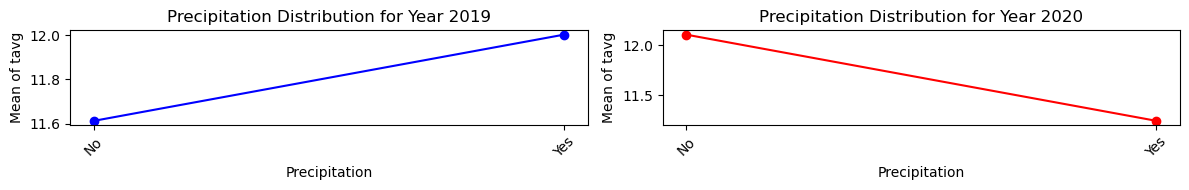

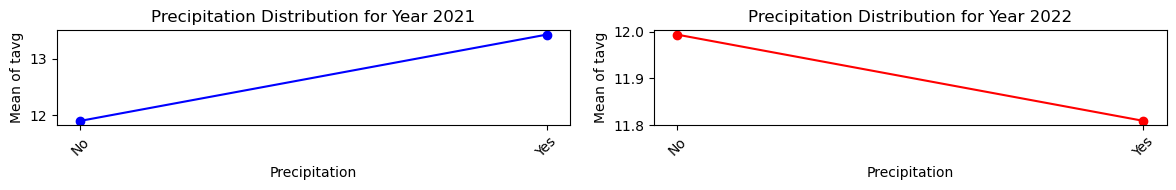

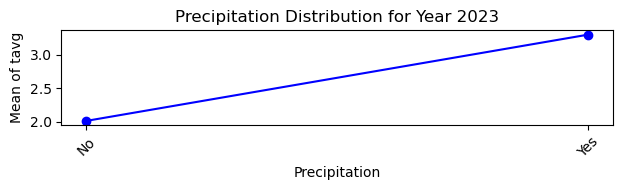

In [81]:
# Data Visualization 4: Line Plot for the pivot table

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pivot_table is your pivot table DataFrame

# Extract years from the index of the pivot table
years = pivot_table.index

# Plotting two years at a time
for i in range(0, len(years), 2):
    plt.figure(figsize=(12, 2))
    
    # Plot first year
    plt.subplot(1, 2, 1)
    plt.plot(pivot_table.columns, pivot_table.loc[years[i]], marker='o', linestyle='-', color='b')
    plt.title(f'Precipitation Distribution for Year {years[i]}')
    plt.xlabel('Precipitation')
    plt.ylabel('Mean of tavg')
    plt.xticks(rotation=45)
    
    # Plot second year
    if i + 1 < len(years):
        plt.subplot(1, 2, 2)
        plt.plot(pivot_table.columns, pivot_table.loc[years[i + 1]], marker='o', linestyle='-', color='r')
        plt.title(f'Precipitation Distribution for Year {years[i + 1]}')
        plt.xlabel('Precipitation')
        plt.ylabel('Mean of tavg')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


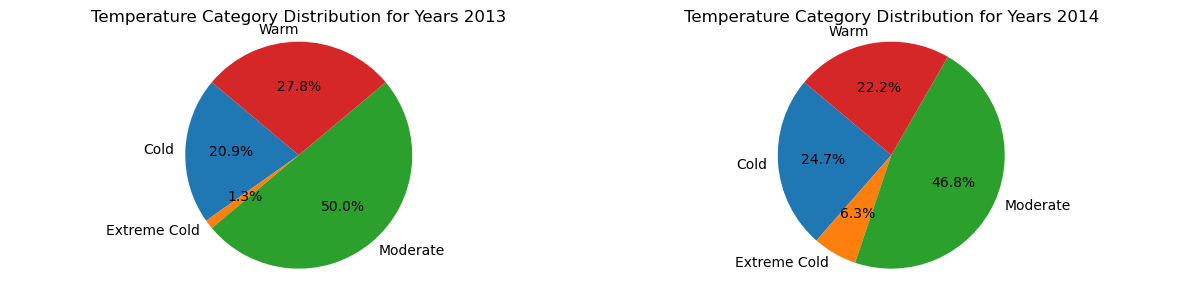

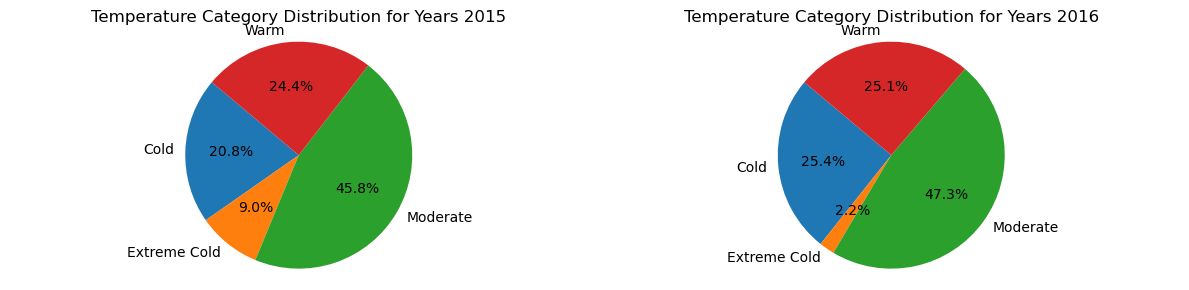

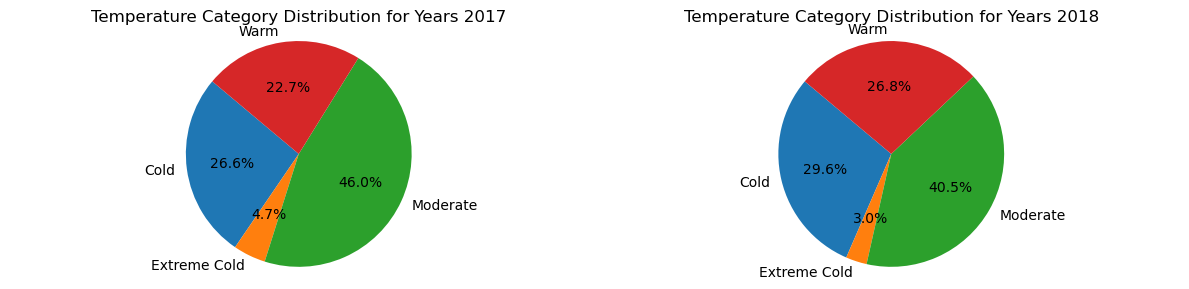

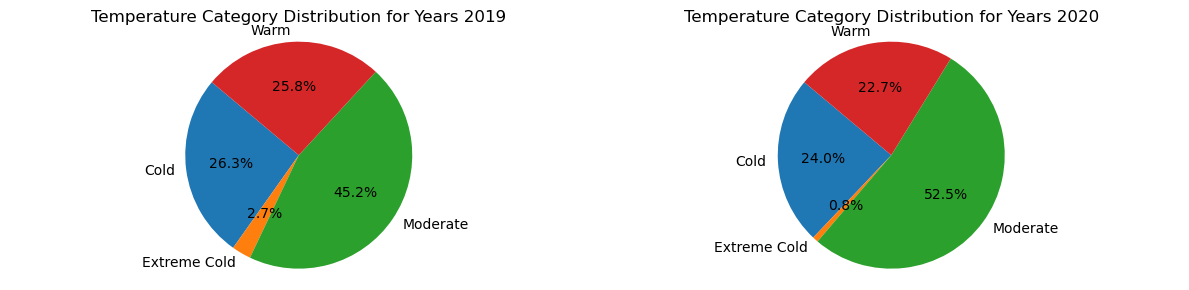

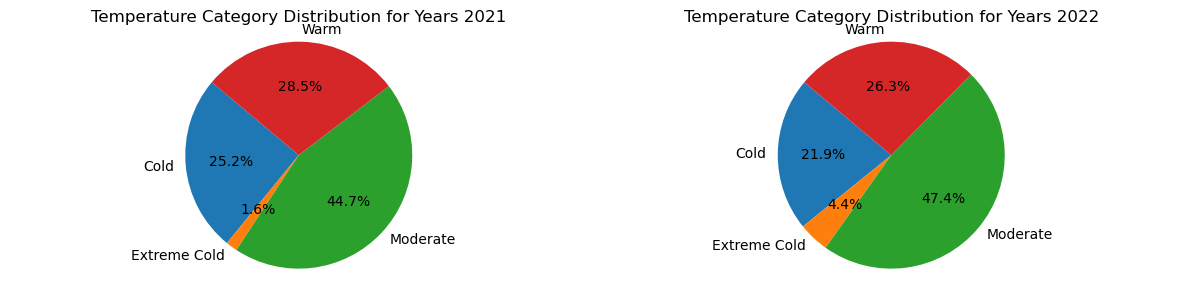

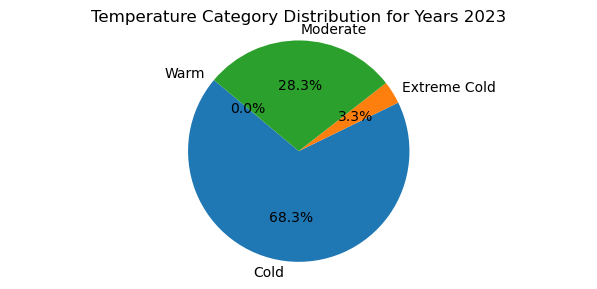

In [39]:
# Data Visualization 5: Pie Chart for temperature category

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'year' and 'temperature_category' and count occurrences
category = df.groupby(['year', 'temperature_category']).size().unstack(fill_value=0)

# Extract years from the index of category_counts
years = category.index

# Plotting two years at a time
for i in range(0, len(years), 2):
    plt.figure(figsize=(12, 3))
    
    # Plot first year
    plt.subplot(1, 2, 1)
    plt.pie(category.loc[years[i]], labels=category.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Temperature Category Distribution for Years {years[i]}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Plot second year (if available)
    if i + 1 < len(years):
        plt.subplot(1, 2, 2)
        plt.pie(category.loc[years[i + 1]], labels=category.columns, autopct='%1.1f%%', startangle=140)
        plt.title(f'Temperature Category Distribution for Years {years[i + 1]}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()


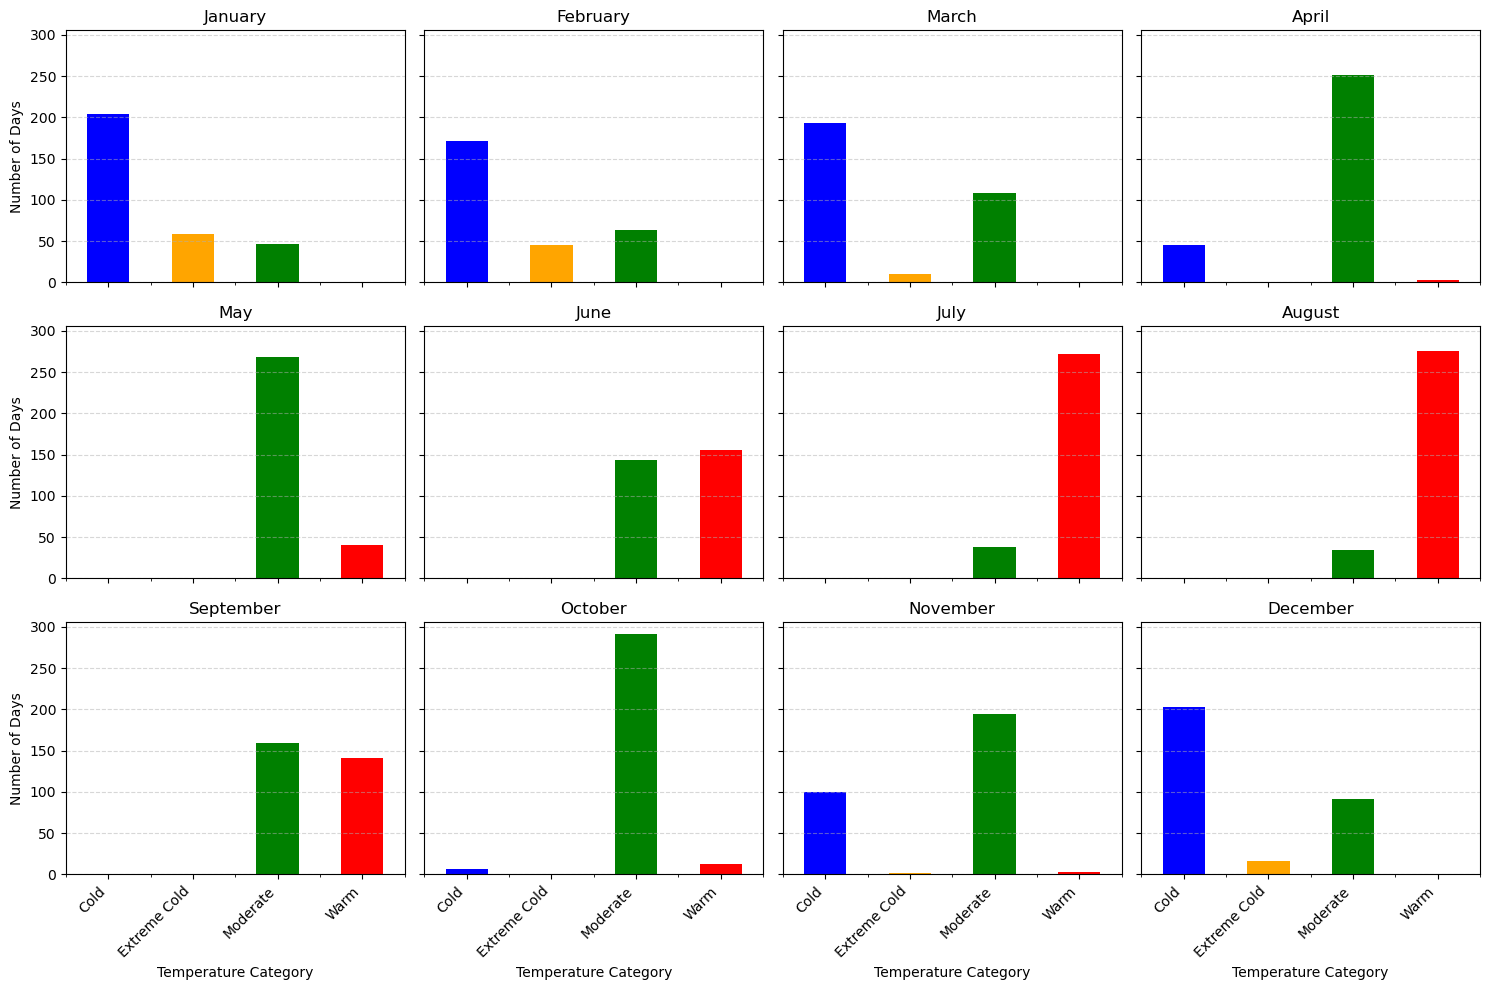

In [77]:
# Data Visualization 6: Bar Graphs for month and temperature category

# Importing the required librariesimport pandas as pd
import matplotlib.pyplot as plt

# Group the data by month and temperature category and count the number of days
monthly_counts = df.groupby(['Month', 'temperature_category']).size().unstack(fill_value=0)

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
                'November', 'December']

# Plot bar graphs for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, month in enumerate(months_order, start=1):
    ax = axes[i - 1]
    if month in monthly_counts.index:
        monthly_counts.loc[month].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green', 'red'], legend=False)
    ax.set_title(month, fontsize=12)  # Set the month name as the title
    ax.set_xlabel('Temperature Category', fontsize=10)
    ax.set_ylabel('Number of Days', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_xticklabels(monthly_counts.columns, rotation=45, ha='right')  # Set category names on x-axis

plt.tight_layout()
plt.show()


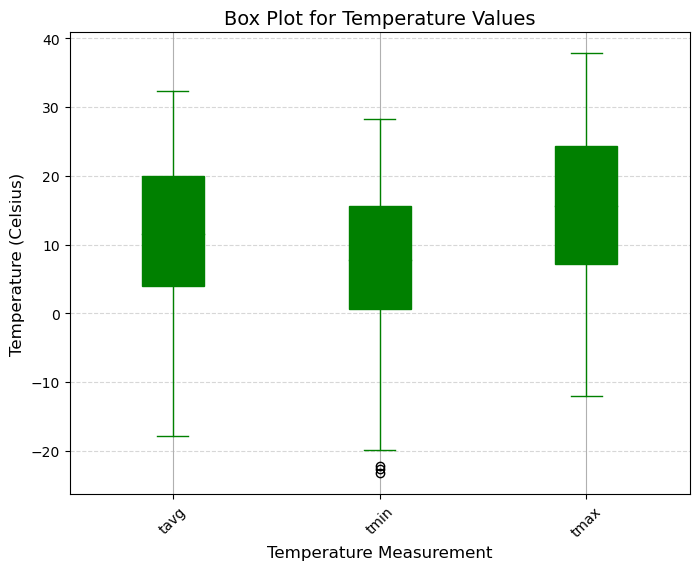

In [80]:
# Data Visualization 7: Box Plot for tmax, tmin and tavg values

# Importing the required libraries
import matplotlib.pyplot as plt

# Select the columns for the box plot
boxplot_data = df[['tavg', 'tmin', 'tmax']]

# Create a vertical box plot
plt.figure(figsize=(8, 6))
boxplot_data.boxplot(rot=45, vert=True, patch_artist=True, color= 'green')
plt.title('Box Plot for Temperature Values', fontsize=14)
plt.xlabel('Temperature Measurement', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
